<a href="https://colab.research.google.com/github/LikhithCharugundla/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

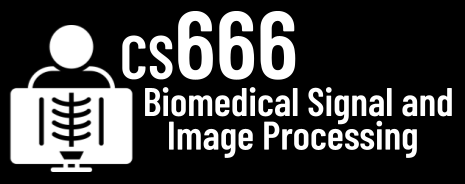
#Assignment 5

In [76]:
# NAME:Likhith Charugundla

In [77]:
# In this assignment, we will visualize and explore a CT scan!

In [78]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [79]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [80]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [81]:
!wget https://cs666.org/data/ct.zip

--2024-04-16 02:56:15--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip.1’

ct.zip.1            100%[===================>]   5.58M  --.-KB/s    in 0.1s    

2024-04-16 02:56:15 (53.9 MB/s) - ‘ct.zip.1’ saved [5847706/5847706]



In [82]:
# Then use the following snippet to extract the data.

In [83]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [84]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [85]:
# TODO: 220 Slices

In [86]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [87]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

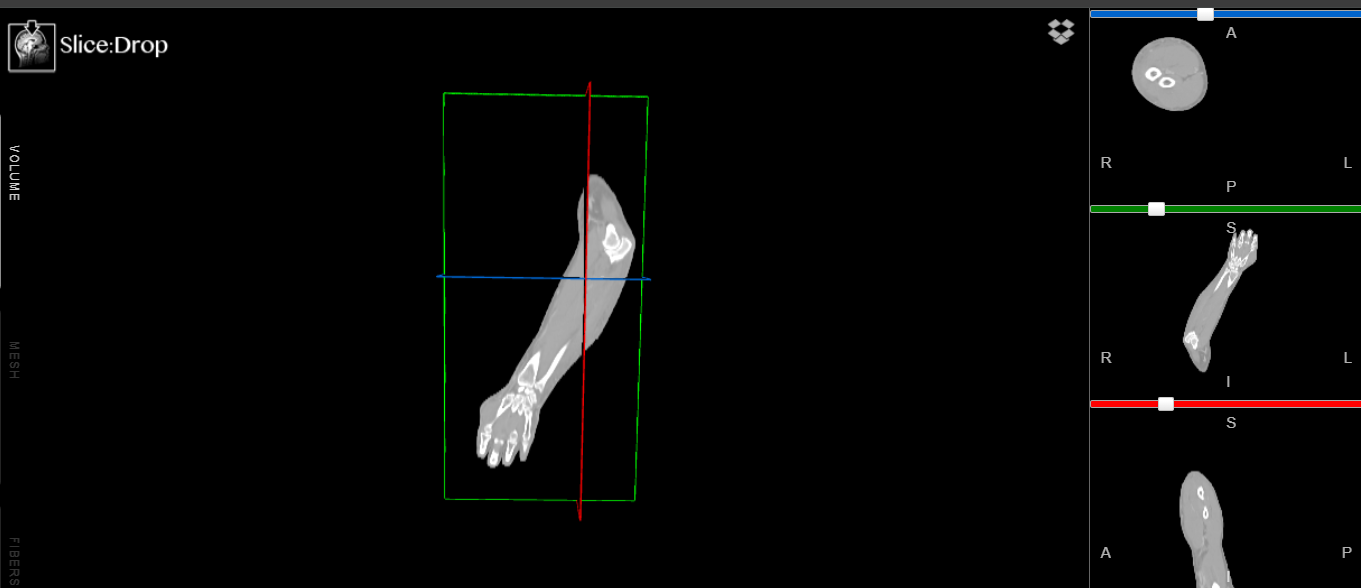

In [88]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [89]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

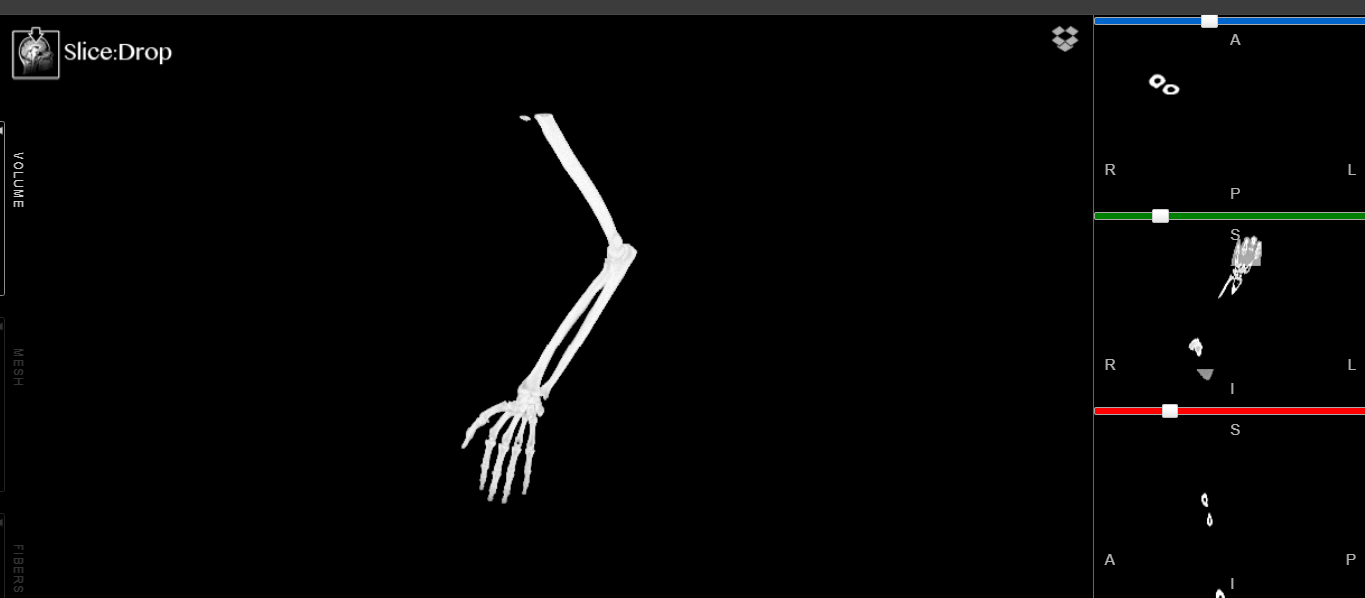

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [90]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [91]:
from pydicom import dcmread

In [92]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os

dir_path = "ct"
name = os.listdir(dir_path)
name.sort()

file_path = os.path.join(dir_path, name[0])
file = dcmread(file_path)
dims = list(file.pixel_array.shape) + [len(name)]

ct_array = np.zeros(dims, dtype=np.uint16)

for i, name in enumerate(name):
    dicom_file = dcmread(os.path.join(dir_path, name))
    ct_array[:, :, i] = dicom_file.pixel_array

In [93]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

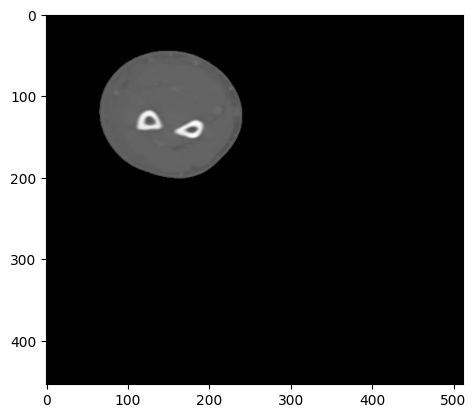

In [94]:
# TODO: YOUR CODE FOR AXIAL
axial = plt.plot()
plt.imshow(ct_array[:, :, dims[2]//2], cmap='gray')

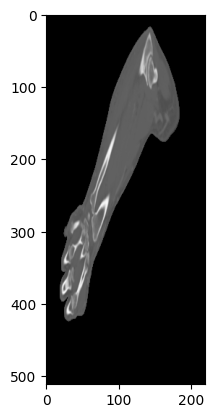

In [95]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal = plt.plot()
plt.imshow(ct_array[dims[0]//4, :, :], cmap='gray')

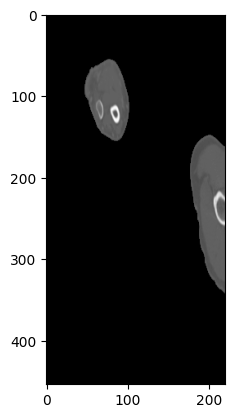

In [96]:
# TODO: YOUR CODE FOR CORONAL
coronal = plt.plot()
plt.imshow(ct_array[:, dims[1]//2, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [97]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [98]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

30
410
-1024


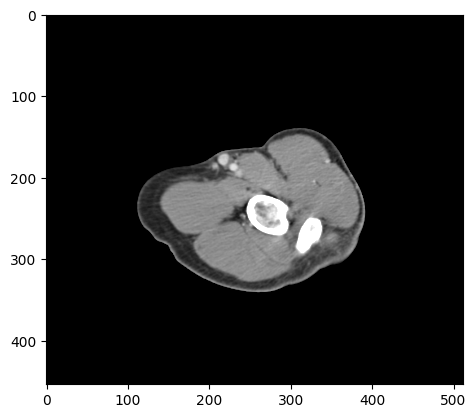

In [99]:
# TODO: YOUR CODE
dicom_file
window_center = dicom_file.WindowCenter
window_width = dicom_file.WindowWidth
rescale_intercept = dicom_file['RescaleIntercept'].value
print(window_center)
print(window_width)
print(rescale_intercept)

vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [100]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

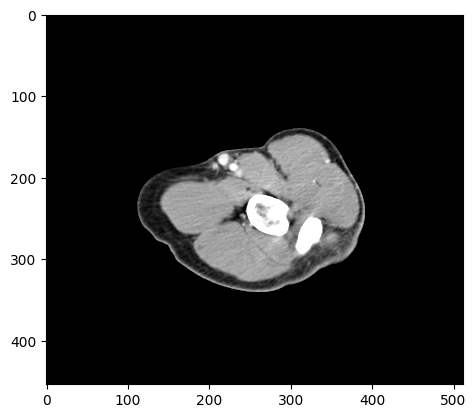

In [101]:
# TODO: YOUR CODE
window_center = 10
window_width = 300
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

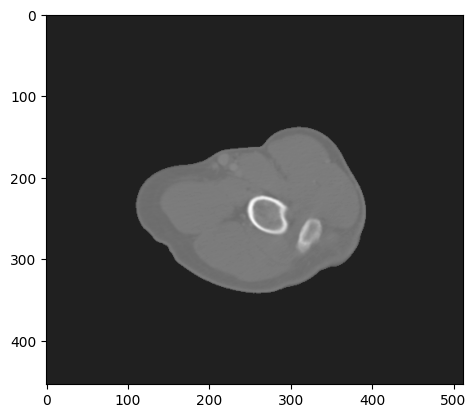

In [102]:
window_center = 100
window_width = 3000
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

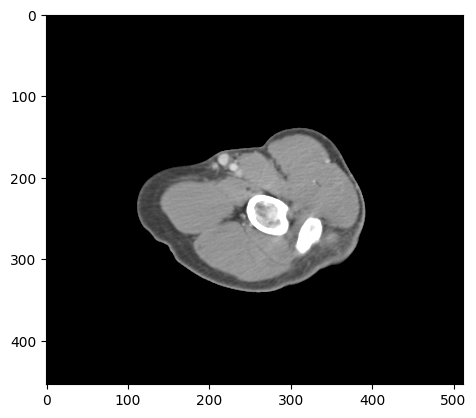

In [103]:
window_center = 10
window_width = 500
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [104]:
# Which values make sense and why?

In [105]:
# TODO: YOUR ANSWER
#Since the data set is not equal to the data within it, there is no one match for all types of values.
#Thus, the values are always dependent on the relevant data at that particular moment.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [106]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

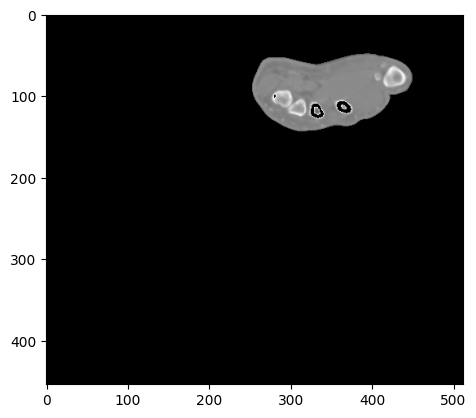

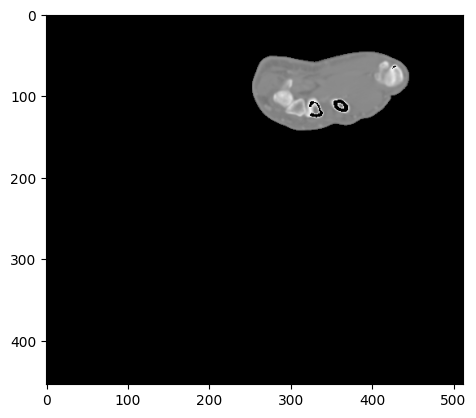

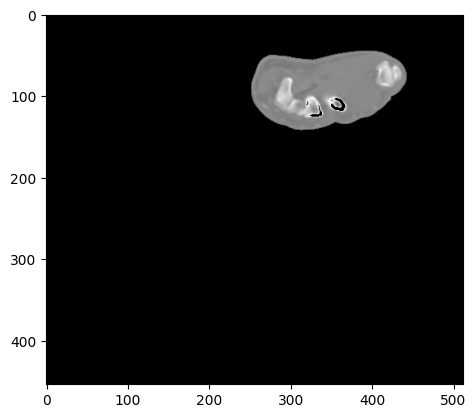

In [107]:
# TODO: YOUR CODE TO SEGMENT FAT
for i in range(3):
    fat_mask = ct_array.copy()
    fat_mask[fat_mask > 2000] = 0
    fat_mask = np.int16(fat_mask)
    plt.imshow(fat_mask[:, :, i+50], cmap='gray')
    plt.show()

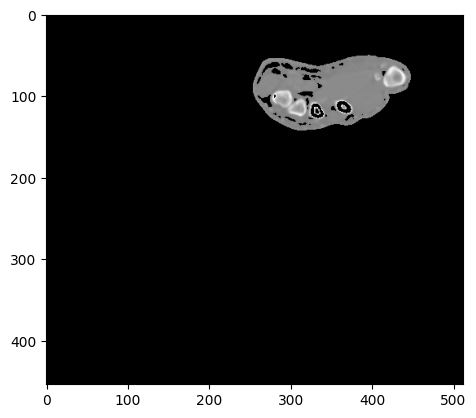

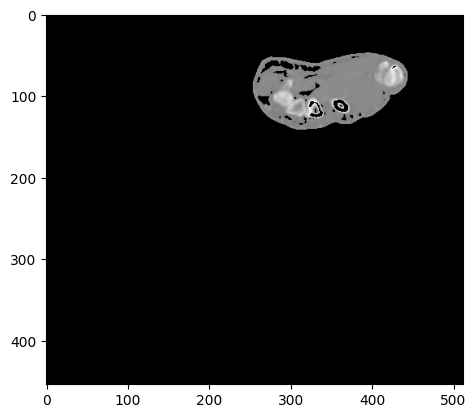

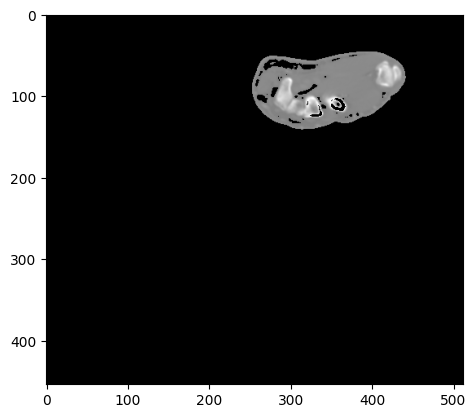

In [108]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
for i in range(3):
  tissue_mask = ct_array.copy()
  tissue_mask[tissue_mask < 1000] = 0
  tissue_mask[tissue_mask > 2000] = 0
  tissue_mask = np.int16(tissue_mask)
  plt.imshow(tissue_mask[:, :, i+50], cmap='gray')
  plt.show()

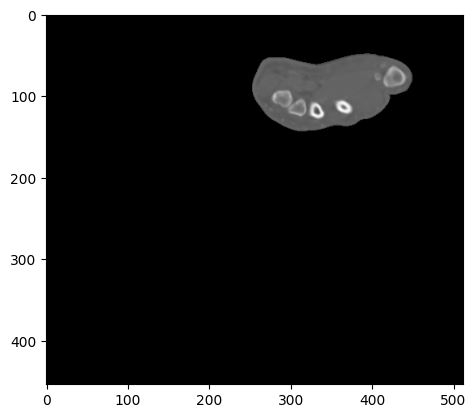

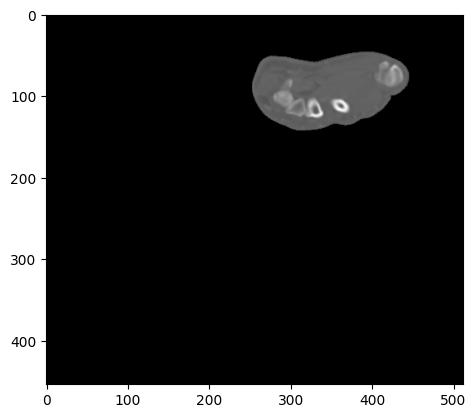

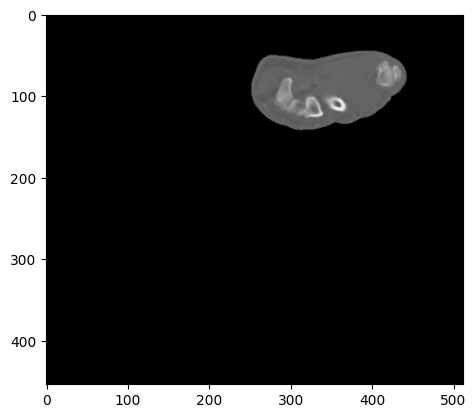

In [109]:
# TODO: YOUR CODE TO SEGMENT BONES
for i in range(3):
  bone_mask = ct_array.copy()
  bone_mask[bone_mask < 200] = 0
  bone_mask = np.int16(bone_mask)
  plt.imshow(bone_mask[:, :, i+50], cmap='gray')
  plt.show()

In [110]:
# Are the segmentations good?

In [111]:
# TODO: YOUR ANSWER
#Yes

In [112]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""